### Naive Bayes Classifier

In [195]:
#Multinomial
##for dicrete feature dataset

In [196]:
import numpy as np
import pandas as pd

#### DataPreparation

In [197]:
df = pd.read_csv("mushrooms.csv")

In [198]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [199]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [200]:
le = LabelEncoder()
ds = df.apply(le.fit_transform)

In [201]:
print(type(ds))
ds.head()

<class 'pandas.core.frame.DataFrame'>


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [202]:
data = ds.values
print(type(data))
print(data.shape)
print(data[:5,:])
data_x = data[:,1:]
data_y = data[:,0]

<class 'numpy.ndarray'>
(8124, 23)
[[1 5 2 4 1 6 1 0 1 4 0 3 2 2 7 7 0 2 1 4 2 3 5]
 [0 5 2 9 1 0 1 0 0 4 0 2 2 2 7 7 0 2 1 4 3 2 1]
 [0 0 2 8 1 3 1 0 0 5 0 2 2 2 7 7 0 2 1 4 3 2 3]
 [1 5 3 8 1 6 1 0 1 5 0 3 2 2 7 7 0 2 1 4 2 3 5]
 [0 5 2 3 0 5 1 1 0 4 1 3 2 2 7 7 0 2 1 0 3 0 1]]


In [203]:
x_train,x_test,y_train,y_test = train_test_split(data_x,data_y,test_size = 0.2)

In [204]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)
print(type(x_train))

(6499, 22) (1625, 22)
(6499,) (1625,)
<class 'numpy.ndarray'>


In [205]:
#testing numpy
a = np.unique(y_train,return_counts="true")
print(a[0].shape)
b = np.sum(y_train == 1)
print(b)
a = np.unique(y_train)
print(a)
print(np.argmax(a))
print(a.shape[0])
print(y_train.shape[0])
#

(2,)
3130
[0 1]
1
2
6499


In [206]:
#Algorithm

In [207]:
def prior_prob(y_train,label):
    numer = np.sum(y_train == label)
    denom = y_train.shape[0]
    return numer/denom

def likelihood(x_train,y_train,x_test,label):
    x_filtered = x_train[y_train == label]      #()doesent work here
    features = x_train.shape[1]              #This code is written for cases where no. of features of x_test = x_train. 
    like = 1
    alpha = 0.2                           #laplace smoothing(smaller alpha->lesser significance of nonoccuring feature value.)
    for f in range(features):
        a = np.sum(x_filtered[:,f] == x_test[f]) + 1*alpha
        b = x_filtered.shape[0] + ((np.unique(x_filtered[:,f])).shape[0])*alpha
        cond_prob = a/b
        like *= cond_prob
    return like

def predict(x_train,y_train,x_test):
    classes = np.unique(y_train)
    post_prob = []
    for label in classes:
        post = likelihood(x_train,y_train,x_test,label)*prior_prob(y_train,label)
        post_prob.append(post)
    pred = np.argmax(post_prob)
    return pred

In [208]:
print(predict(x_train,y_train,x_test[157]))
print(y_train[157])

1
1


In [209]:
def score(x_train,y_train,x_test,y_test):
    m = x_test.shape[0]
    correct_pred = 0
    for i in range(m):
        p = predict(x_train,y_train,x_test[i])
        if(p == y_test[i]):
            correct_pred +=1
    accuracy = correct_pred/m
    return (accuracy*100)

In [210]:
score(x_train,y_train,x_test,y_test)

96.61538461538461

### Gaussian Naive Bayes

In [211]:
#for continues feature dataset

In [212]:
from sklearn.naive_bayes import GaussianNB

In [213]:
gnb = GaussianNB()

In [214]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [215]:
X,Y = make_classification(n_samples = 200,n_features = 2,n_informative = 2,n_redundant = 0,random_state = 4)

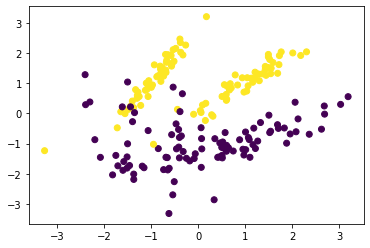

In [216]:
plt.scatter(X[:,0],X[:,1],c = Y)
plt.show()

In [217]:
print(X[0])
print(X.shape)

[-1.36748138 -2.18619146]
(200, 2)


In [218]:
gnb.fit(X,Y)      #Algorithmi code to be written

GaussianNB(priors=None, var_smoothing=1e-09)

In [219]:
gnb.score(X,Y)

0.9

In [220]:
ypred = gnb.predict(X)
print(ypred)

[0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0
 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1
 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0
 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1
 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0
 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1]


In [221]:
print(Y)

[0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1
 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0
 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1
 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0
 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1]


In [222]:
import numpy as np
acc = np.sum(ypred == Y)/X.shape[0]
print(acc)

0.9


### Naive Bayes on MNIST data

In [223]:
#MNIST-Handwritten image dataset

In [224]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

#### Dataset Prepartion

In [225]:
#Load the sklearn MNIST Datasets
digits = load_digits()

In [226]:
X = digits.data
Y = digits.target

In [227]:
print(X.shape)
print(Y.shape)
print(type(X))

(1797, 64)
(1797,)
<class 'numpy.ndarray'>


0


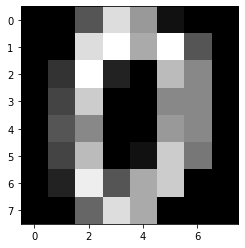

In [228]:
plt.imshow(X[0].reshape(8,8),cmap = 'gray')
print(Y[0])
plt.show()

In [229]:
print(X[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


#### Train Model

In [230]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB

In [231]:
gnb = GaussianNB()
mnb = MultinomialNB()

In [232]:
gnb.fit(X,Y)
mnb.fit(X,Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [233]:
print(gnb.score(X,Y))
print(mnb.score(X,Y))

0.8580968280467446
0.9053978853644964


In [234]:
print(cross_val_score(gnb,X,Y,scoring = "accuracy",cv = 10).mean())

0.8103537583567821


In [235]:
print(cross_val_score(mnb,X,Y,scoring = "accuracy",cv = 10).mean())

0.8819396216300838


In [236]:
#MNB gives better result cause features hold dicrete values